In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#pd.set_option('display.max_columns',None)
df=pd.read_csv("C:/Users/hp1/Documents/minor/WDIEXCEL2.csv")

#get shape of data
print(df.shape)

#get unique indicator values
indi_unique=len(list(df.Indicator_Name.unique()))
print(indi_unique)

#get unique indicator names
country_unique=len(list(df.Country_Name.unique()))
print(country_unique)

#frequency of each unique indicator
print(df['Indicator_Name'].value_counts())

In [ ]:
#check for rows which have null values for all years 
df1=df[df.loc[:,'1960':'2020'].isnull().all(axis=1)]

#get column wise sum of null values
print(df1.isnull().sum().sort_values(ascending=False))

#remove those rows
df.drop(list(df1.index),inplace=True)
print(df.shape)
df.to_csv('C:/Users/hp1/Documents/minor/WDIEXCEL1.csv')

In [ ]:
#stacked bar graph
df1=df.where((df['Indicator_Code']=='SL.TLF.0714.WK.ZS') | (df['Indicator_Code']=='SL.TLF.0714.SW.ZS'))
df1.dropna(how='all',inplace=True)
print(df1.shape)
print(df1.head(10))
df1.to_csv('C:/Users/hp1/Documents/minor/education1.csv')

#df1=df.where(df['Indicator_Name']=='Fossil fuel energy consumption (% of total)')
#df1.dropna(how='all',inplace=True)
#print(df1.head(10))

#df=df[df.loc['0':'99']]#,'Indicator_Name']]
#print(df.shape)
#y=df.head()
#print(y.index.values)

In [ ]:
df=pd.read_csv("C:/Users/hp1/Documents/minor/parttwo.csv")
pd.set_option('display.max_columns', 500)

In [39]:
df1=df.loc[0:299,'Indicator_Name']
stop_words = set(stopwords.words('english'))
for i in range(0,df1.size):
    df1[i]=re.sub('\(.*?\)',"",df1[i])        #remove content within brackets
    df1[i] = re.sub(r'[^\w\s]',"", df1[i])    #remove punctuations
    df1[i] = re.sub('\d',"",df1[i])           #remove numbers
    word_tokens = word_tokenize(df1[i])
    df1[i]=" ".join(filter(lambda x: x not in stop_words , word_tokens))   #remove stop words

In [ ]:
#stemming, pca

In [43]:
#apply tf-idf vectorization

pd.set_option('display.max_columns', 500)
#v=CountVectorizer() 
v=TfidfVectorizer()
v1=v.fit_transform(df1)
#print(v.get_feature_names())
#print(v.vocabulary_)
arr=v1.toarray()

In [44]:
#apply k-means

Kmean = KMeans(n_clusters=9,random_state=0)
cluster=Kmean.fit_predict(arr)
df2=pd.Series(list(cluster))
df1=pd.concat([df1,df2],axis=1)
df1.rename(columns={0:'Cluster'},inplace=True)
df1.to_csv("C:/Users/hp1/Documents/minor/withcluster.csv")
#print(Kmean.cluster_centers_)
#print(Kmean.labels_)

df1.head()
#df1[df1.Cluster==1]['Indicator_Name']

,Indicator_Name,Cluster
0,Access clean fuels technologies cooking,0
1,Access electricity,0
2,Access electricity rural,0
3,Access electricity urban,0
4,Account ownership financial institution mobile...,3


In [45]:
df1.sort_values('Cluster',inplace=True)
df1.head(25)

,Indicator_Name,Cluster
0,Access clean fuels technologies cooking,0
142,Changes inventories,0
143,Changes inventories,0
144,Changes inventories,0
145,Charges use intellectual property payments,0
146,Charges use intellectual property receipts,0
147,Chemicals,0
298,DEC alternative conversion factor,0
157,Children living HIV,0
158,Children newly infected HIV,0


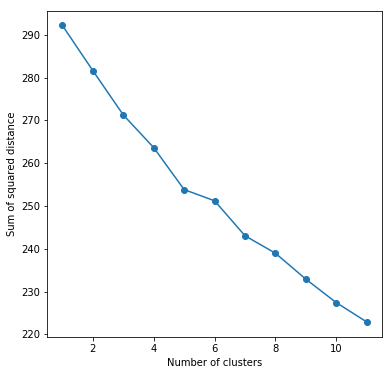

In [46]:
#implement elbow method

sse = []
list_k = list(range(1, 12))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(arr)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of squared distance');

In [ ]:
#calc dunn index 